In [1]:
import numpy as np
import scipy.stats as s

from math import sqrt
from math import factorial as fact
from math import exp

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

%matplotlib inline

## Functions

In [2]:
# Binomial PMF
def n_choose_k(n, k):
    return fact(n) / (fact(k)*(fact(n-k)))

def binomial(n, k, p):
    '''
    n = number of trials
    k = number of successes
    p = probability of success
    return probability of k successes
    '''
    return n_choose_k(n, k) * p**k * (1-p)**(n-k)

# Geometric 
def geometric(p, k):
    '''
    k = kth trial
    p = probability of success
    return probability of first success on kth trial
    '''
    return (1-p)**(k-1) * p

# Poisson PMF
def poisson(lam, k):
    '''
    lam = expected successes in time interval
    k = number of successes
    return probability of k successes
    '''
    return lam**k * exp(-lam) / fact(k)

def myround(x, base=5):
    x = float(int(x*100))
    return int(base * int(x/base))/100 + .05

## Bernoulli

Ex. Winter is over and it is time for the Westeros Sports Ball League!  The probability of Wilterfell Direwolves winning any given game is 0.1 (they have sustained heavy losses over the winter).

In [15]:
p_win = .1
p_loss = 1 - p_win

pw = s.bernoulli.pmf(k=1, p=p_win)
pl = s.bernoulli.pmf(k=0, p=p_win)
print("Probability of a win: {:0.2f}, Probability of a loss: {:0.2f}".format(pw, pl))

Probability of a win: 0.10, Probability of a loss: 0.90


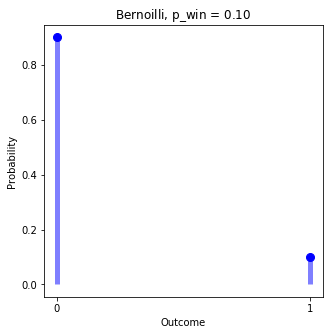

In [16]:
# Plot Bernoulli Distribution

# Create x values
x = np.arange(0, 2)

# Create Plot
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Add Dots
ax.plot(x, s.bernoulli.pmf(k=x, p=p_win), 'bo', ms=8, label='bernoulli pmf')

# Add Vertical lines
ax.vlines(x, 0, s.bernoulli.pmf(k=x, p=p_win), colors='b', lw=5, alpha=0.5)

# Format Axes
ax.set_ylabel('Probability')
ax.set_xlabel('Outcome')
ax.set_xticks(x)

# Set Title
ax.set_title("Bernoilli, p_win = ${:0.2f}$".format(p_win));

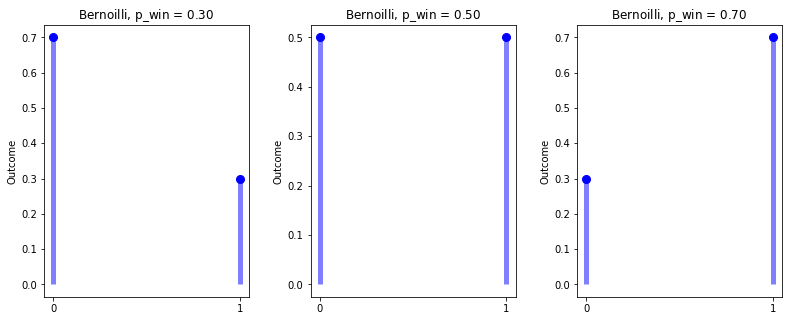

In [5]:
# Plot Bernoulli Distribution with changing ps

# Create x values
x = np.arange(0, 2)

# Set ps
ps = np.arange(.3, .8, .2)

# Create Plot
fig = plt.figure(figsize=(18, 5))
plot = 1
for p in ps:
    # Add Dots
    ax = fig.add_subplot(1,4,plot)
    ax.plot(x, s.bernoulli.pmf(k=x, p=p), 'bo', ms=8, label='bernoulli pmf')

    # Add Vertical lines
    ax.vlines(x, 0, s.bernoulli.pmf(k=x, p=p), colors='b', lw=5, alpha=0.5)

    # Format Axes
    ax.set_ylabel('Probability')
    ax.set_ylabel('Outcome')
    ax.set_xticks(x)

    # Set Title
    ax.set_title("Bernoilli, p_win = ${:0.2f}$".format(p))
    plot += 1
    
plt.subplots_adjust(wspace=0.3,hspace=.4);

## Binomial Distribution
- k successes out of n trials

Ex. There are 50 games in the Westeros Sports Ball season. What is the probability of the Direwolves winning 2 games this season?

In [17]:
# Binomial Distribution.

n = 50
p = .1
k = 2
mu = n*p

# Equation
p1 = binomial(n, k, p)

# Scipy Stats PMF
p2 = s.binom.pmf(k=k, n=n, p=p)

# Scipy Stats CMF
p3 = s.binom.cdf(k=k, n=n, p=p) - s.binom.cdf(k=1, n=n, p=p)
print('Formula: {:.4f}, scipy.pmf: {:.4f}, scipy.cdf: {:.4f}'.format(p1, p2, p3))

Formula: 0.0779, scipy.pmf: 0.0779, scipy.cdf: 0.0779


Probability of 2 wins is 0.08


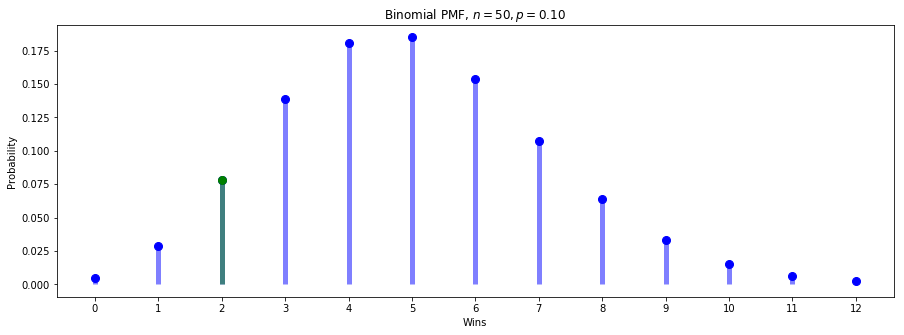

In [18]:
# Plot Binomial Distribution PMF

print("Probability of {} wins is {:.2f}".format(k, p2))

# Create x values
x = np.arange(s.binom.ppf(.001, n, p), s.binom.ppf(.999, n, p))

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Add Dots
ax.plot(x, s.binom.pmf(x, n, p), 'bo', ms=8, label='binomial pmf')
ax.plot(k, s.binom.pmf(k, n, p), 'go', ms=8, label='binomial pmf')

# Add Vertical lines
ax.vlines(x, 0, s.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax.vlines(k, 0, s.binom.pmf(k, n, p), colors='g', lw=5, alpha=0.5)

# Format Axes
ax.set_ylabel('Probability')
ax.set_xlabel('Wins')
ax.set_xticks(x)

# Set Title
ax.set_title("Binomial PMF, $n={0}, p = {1:0.2f}$".format(n, p));

Probability of 2 wins is 0.08


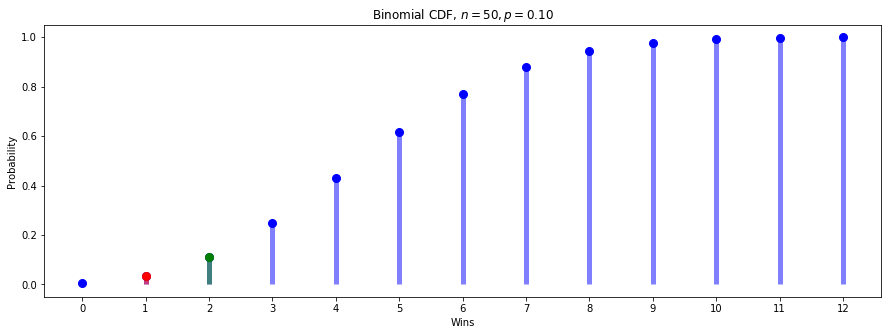

In [8]:
# Plot Binomial Distribution CDF

print("Probability of {} wins is {:.2f}".format(k, p2))

# Create x values
x = np.arange(s.binom.ppf(.001, n, p), s.binom.ppf(.999, n, p))

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Add Dots
ax.plot(x, s.binom.cdf(x, n, p), 'bo', ms=8, label='binomial cdf')
ax.plot(k, s.binom.cdf(k, n, p), 'go', ms=8, label='binomial cdf')
ax.plot(k-1, s.binom.cdf(k-1, n, p), 'ro', ms=8, label='binomial cdf')

# Add Vertical lines
ax.vlines(x, 0, s.binom.cdf(x, n, p), colors='b', lw=5, alpha=0.5)
ax.vlines(k, 0, s.binom.cdf(k, n, p), colors='g', lw=5, alpha=0.5)
ax.vlines(k-1, 0, s.binom.cdf(k-1, n, p), colors='r', lw=5, alpha=0.5)

# Format Axes
ax.set_ylabel('Probability')
ax.set_xlabel('Wins')
ax.set_xticks(x)

# Set Title
ax.set_title("Binomial CDF, $n={0}, p = {1:0.2f}$".format(n, p));

## Geometric
- first success on kth trial

Ex. What is the probabilty that the Direwolves don't win until the 20th game?

In [19]:
# Geometric Distribution

p = .1
k = 20
mu = 1/p

# Equation
p1 = geometric(p, k)

# Scipy Stats PMF
p2 = s.geom.pmf(p=p, k=k)

# Scipy Stats CMF
p3 = s.geom.cdf(p=p, k=k) - s.geom.cdf(p=p, k=k-1)
print('Formula: {:.4f}, scipy.pmf: {:.4f}, scipy.cdf: {:.4f}'.format(p1, p2, p3))

Formula: 0.0135, scipy.pmf: 0.0135, scipy.cdf: 0.0135


Probability of not winning until the 20th game is 0.01


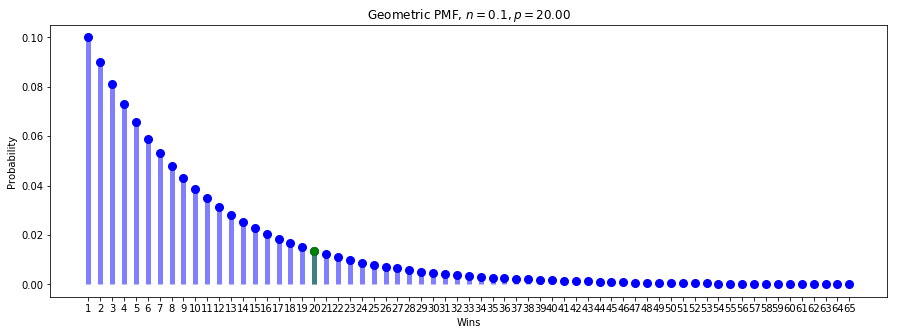

In [20]:
# Plot Geometric Distribution PMF

print("Probability of not winning until the {}th game is {:.2f}".format(k, p2))

# Create x values
x = np.arange(s.geom.ppf(.001, p), s.geom.ppf(.999, p))

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Add Dots
ax.plot(x, s.geom.pmf(p=p, k=x), 'bo', ms=8, label='geometric pmf')
ax.plot(k, s.geom.pmf(p=p, k=k), 'go', ms=8, label='geometric pmf')

# Add Vertical lines
ax.vlines(x, 0, s.geom.pmf(p=p, k=x), colors='b', lw=5, alpha=0.5)
ax.vlines(k, 0, s.geom.pmf(p=p, k=k), colors='g', lw=5, alpha=0.5)

# Format Axes
ax.set_ylabel('Probability')
ax.set_xlabel('Wins')
ax.set_xticks(x)

# Set Title
ax.set_title("Geometric PMF, $n={0}, p = {1:0.2f}$".format(p, k));

Probability of not winning until the 20th game is 0.01


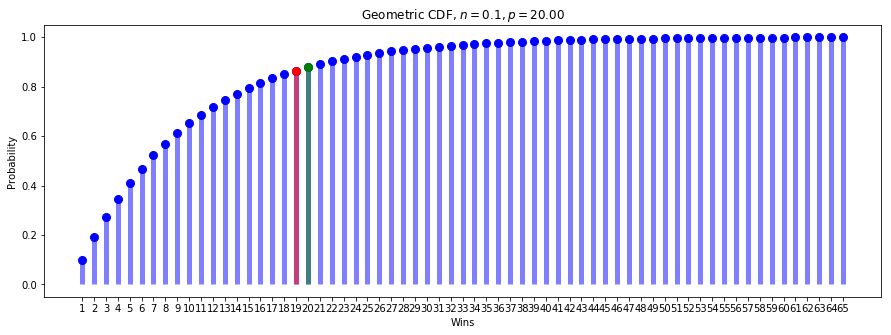

In [11]:
# Plot Geometric Distribution CDF

print("Probability of not winning until the {}th game is {:.2f}".format(k, p2))

# Create x values
x = np.arange(s.geom.ppf(.001, p), s.geom.ppf(.999, p))

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Add Dots
ax.plot(x, s.geom.cdf(p=p, k=x), 'bo', ms=8, label='geometric cdf')
ax.plot(k, s.geom.cdf(p=p, k=k), 'go', ms=8, label='geometric cdf')
ax.plot(k-1, s.geom.cdf(p=p, k=k-1), 'ro', ms=8, label='geometric cdf')

# Add Vertical lines
ax.vlines(x, 0, s.geom.cdf(p=p, k=x), colors='b', lw=5, alpha=0.5)
ax.vlines(k, 0, s.geom.cdf(p=p, k=k), colors='g', lw=5, alpha=0.5)
ax.vlines(k-1, 0, s.geom.cdf(p=p, k=k-1), colors='r', lw=5, alpha=0.5)

# Format Axes
ax.set_ylabel('Probability')
ax.set_xlabel('Wins')
ax.set_xticks(x)

# Set Title
ax.set_title("Geometric CDF, $n={0}, p = {1:0.2f}$".format(p, k));

## Poisson
- probabilty of k successes over a time interval

Ex. The thirsty Direwolf fans go through 10 barrels of ale per game on average.  What is the probability that they would only go through 7?

In [21]:
# Poisson Distribution.
mu = 10 #barrels per game
lam = 10
k = 7

# Equation
poisson1 = poisson(lam=lam, k=k)

# Scipy Stats PMF
poisson2 = s.poisson.pmf(k=k, mu=lam)

# Scipy Stats CDF
poisson3 = s.poisson.cdf(k=k, mu=lam) - s.poisson.cdf(k=k-1, mu=lam)

print('Formula: {:.4f}, scipy.pmf: {:.4f}, scipy.cdf: {:.4f}'.format(poisson1, poisson2, poisson3))

Formula: 0.0901, scipy.pmf: 0.0901, scipy.cdf: 0.0901


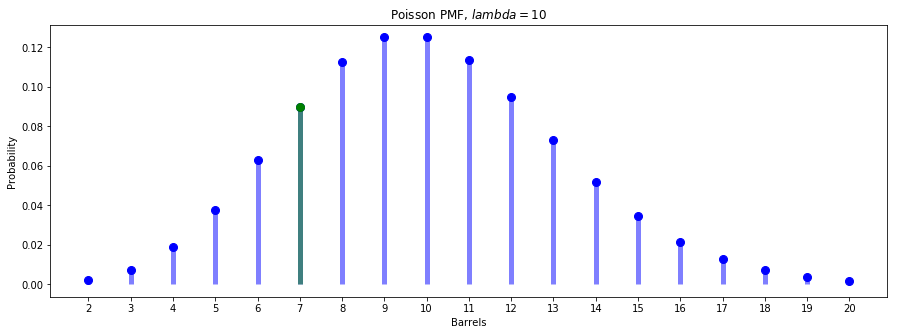

In [13]:
# Plot Poisson Distribution PMF

# Create x values
x = np.arange(s.poisson.ppf(.001, lam), s.poisson.ppf(.999, lam), 1)

# Create Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Add Dots
ax.plot(x, s.poisson.pmf(k=x, mu=lam), 'bo', ms=8, label='Poisson pmf')
ax.plot(k, s.poisson.pmf(k=k, mu=lam), 'go', ms=8, label='Poisson pmf')

# Add Verical Lines
ax.vlines(x, 0, s.poisson.pmf(k=x, mu=lam), colors='b', lw=5, alpha=0.5)
ax.vlines(k, 0, s.poisson.pmf(k=k, mu=lam), colors='g', lw=5, alpha=0.5)

# Format Axes
ax.set_ylabel('Probability')
ax.set_xlabel('Barrels')
ax.set_xticks(x)

# Set Title
ax.set_title("Poisson PMF, $lambda={0}$".format(lam));

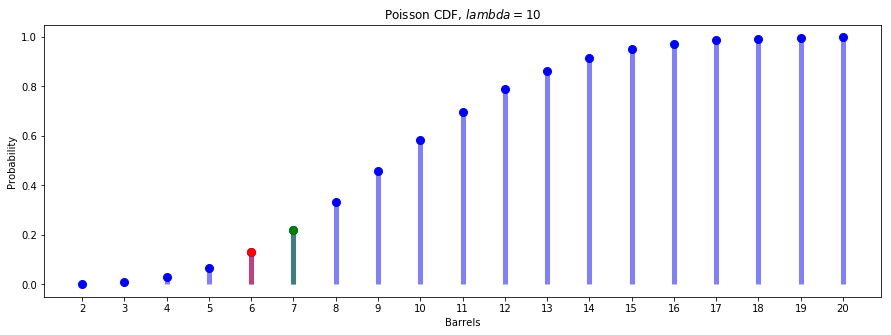

In [14]:
# Plot Poisson Distribution CDF

# Create x values
x = np.arange(s.poisson.ppf(.001, lam), s.poisson.ppf(.999, lam), 1)

# Create Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Add Dots
ax.plot(x, s.poisson.cdf(k=x, mu=lam), 'bo', ms=8, label='Poisson cdf')
ax.plot(k, s.poisson.cdf(k=k, mu=lam), 'go', ms=8, label='Poisson cdf')
ax.plot(k-1, s.poisson.cdf(k=k-1, mu=lam), 'ro', ms=8, label='Poisson cdf')

# Add Verical Lines
ax.vlines(x, 0, s.poisson.cdf(k=x, mu=lam), colors='b', lw=5, alpha=0.5)
ax.vlines(k, 0, s.poisson.cdf(k=k, mu=lam), colors='g', lw=5, alpha=0.5)
ax.vlines(k-1, 0, s.poisson.cdf(k=k-1, mu=lam), colors='r', lw=5, alpha=0.5)

# Format Axes
ax.set_ylabel('Probability')
ax.set_xlabel('Barrels')
ax.set_xticks(x)

# Set Title
ax.set_title("Poisson CDF, $lambda={0}$".format(lam));